In [1]:
#imported necessary dependencies
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
#preproceesing
data=pd.read_csv("insurance.csv")
data.shape

(1338, 7)

In [3]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data["sex"]=data["sex"].map({"male":1,"female":0})
data["smoker"]=data["smoker"].map({"yes":1,"no":0})
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':1})               

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [9]:
X=data.drop(columns="charges", axis=1)
Y=data["charges"]

In [10]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [11]:
Y.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [12]:
#Spliting data into train and test data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
model=LinearRegression()

In [14]:
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
Prediction=model.predict(X_test)
df=pd.DataFrame({"Actual":Y_test,"Model":Prediction})
df

,Actual,Model
764,9095.06825,8562.632734
887,5272.17580,6959.965913
890,29330.98315,36784.839459
1293,9301.89355,9404.858139
259,33750.29180,26858.195025
...,...,...
109,47055.53210,39218.256826
575,12222.89830,11681.978958
535,6067.12675,7261.546478
543,63770.42801,40947.834151


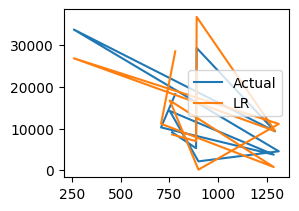

In [17]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Model'].iloc[0:11],label="LR")
plt.legend()


In [19]:
#Score
score = metrics.r2_score(Y_test,Prediction)
score

0.7811240697120638

In [22]:
s1 = metrics.mean_absolute_error(Y_test,Prediction)
s1

4213.352902864173

In [23]:
#prediction for new customer
data1 = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [24]:
df1 = pd.DataFrame(data1,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [25]:
new_prediction=model.predict(df1)
print("Insurance Cost of new prediction is :",new_prediction)

Insurance Cost of new prediction is : [36721.8227866]


In [31]:
## GUI
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
# GUI
root = tk.Tk()
root.title("Insurance Cost Prediction")

mainframe = ttk.Frame(root, padding="20")
mainframe.grid(column=0, row=0, sticky=(tk.W, tk.N, tk.E, tk.S))
mainframe.columnconfigure(0, weight=1)
mainframe.rowconfigure(0, weight=1)

age_label = ttk.Label(mainframe, text="Age:")
age_label.grid(column=1, row=1, sticky=tk.W)
age_entry = ttk.Entry(mainframe, width=10)
age_entry.grid(column=2, row=1, sticky=tk.W)

sex_label = ttk.Label(mainframe, text="Sex:")
sex_label.grid(column=1, row=2, sticky=tk.W)
sex_var = tk.StringVar(value="Male")
sex_combobox = ttk.Combobox(mainframe, textvariable=sex_var, values=["Male", "Female"])
sex_combobox.grid(column=2, row=2, sticky=tk.W)

bmi_label = ttk.Label(mainframe, text="BMI:")
bmi_label.grid(column=1, row=3, sticky=tk.W)
bmi_entry = ttk.Entry(mainframe, width=10)
bmi_entry.grid(column=2, row=3, sticky=tk.W)

children_label = ttk.Label(mainframe, text="Children:")
children_label.grid(column=1, row=4, sticky=tk.W)
children_entry = ttk.Entry(mainframe, width=10)
children_entry.grid(column=2, row=4, sticky=tk.W)

smoker_label = ttk.Label(mainframe, text="Smoker:")
smoker_label.grid(column=1, row=5, sticky=tk.W)
smoker_var = tk.StringVar(value="Yes")
smoker_combobox = ttk.Combobox(mainframe, textvariable=smoker_var, values=["Yes", "No"])
smoker_combobox.grid(column=2, row=5, sticky=tk.W)

region_label = ttk.Label(mainframe, text="Region:")
region_label.grid(column=1, row=6, sticky=tk.W)
region_combobox = ttk.Combobox(mainframe, values=["Southwest", "Southeast", "Northwest", "Northeast"])
region_combobox.grid(column=2, row=6, sticky=tk.W)

def predict_insurance_cost():
    age = int(age_entry.get())
    sex = 1 if sex_var.get() == "Male" else 0
    bmi = float(bmi_entry.get())
    children = int(children_entry.get())
    smoker = 1 if smoker_var.get() == "Yes" else 0
    region = region_combobox.current() + 1

    new_data = {'age': age,
                'sex': sex,
                'bmi': bmi,
                'children': children,
                'smoker': smoker,
                'region': region}
    df = pd.DataFrame(new_data, index=[0])
    new_prediction = model.predict(df)
    predicted_cost_label.config(text=f"Predicted Insurance Cost: ${new_prediction[0]:.2f}")

predict_button = ttk.Button(mainframe, text="Predict", command=predict_insurance_cost)
predict_button.grid(column=2, row=7, sticky=tk.W)

predicted_cost_label = ttk.Label(mainframe, text="")
predicted_cost_label.grid(column=1, row=8, columnspan=2, sticky=tk.W)

for child in mainframe.winfo_children():
    child.grid_configure(padx=5, pady=5)

root.mainloop()